In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
df = pd.read_csv("../data/engineered_copd_data.csv")

In [3]:
df.head()

,Age,Gender,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis,Pollution_Risk_Score,Smoking_Status_encoded,Smoking_Pollution_interaction,Location_Biratnagar,Location_Birgunj,Location_Dharan,Location_Kathmandu,Location_Lalitpur,Location_Pokhara,Location_Rupandehi
0,37,0,True,False,False,33.42,235,False,False,1,0.5,117.5,False,False,False,False,True,False,False
1,46,1,False,True,True,24.73,68,False,True,0,0.5,34.0,False,False,False,False,True,False,False
2,72,1,True,False,False,23.40,98,True,True,0,1.0,98.0,False,True,False,False,False,False,False
3,38,0,True,False,True,30.26,255,False,True,1,0.0,0.0,False,False,False,False,True,False,False
4,75,1,False,False,True,30.20,176,True,False,1,1.0,176.0,False,False,False,False,True,False,False


In [4]:
# define the features and the target variable
X, y = df.drop(columns=["COPD_Diagnosis"]), df["COPD_Diagnosis"]

In [5]:
# split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training
- Based on the data, it is a binary classification problem set as we are prediction if someone has COPD or not, hence we are going to use following models:
- Logistic Regression
- Decision Trees
- Random Forest

In [6]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [7]:
# initialize the model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [10]:
# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Save the models
    with open(f"../models/{name.replace(' ', '_')}.pkl", "wb") as file:
        pickle.dump(model, file)
    
    print(f"{name} model trained and saved")

print("Model training completed")

Logistic Regression model trained and saved
Decision Tree model trained and saved
Random Forest model trained and saved
Model training completed


# Model Evaluation

In [11]:
# Function to print and plot confusion matrix
def print_and_plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


Logistic Regression Evaluation: 
              precision    recall  f1-score   support

       False       0.51      0.59      0.55        93
        True       0.59      0.51      0.55       107

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.56      0.55      0.55       200


Confusion Matrix:
[[55 38]
 [52 55]]


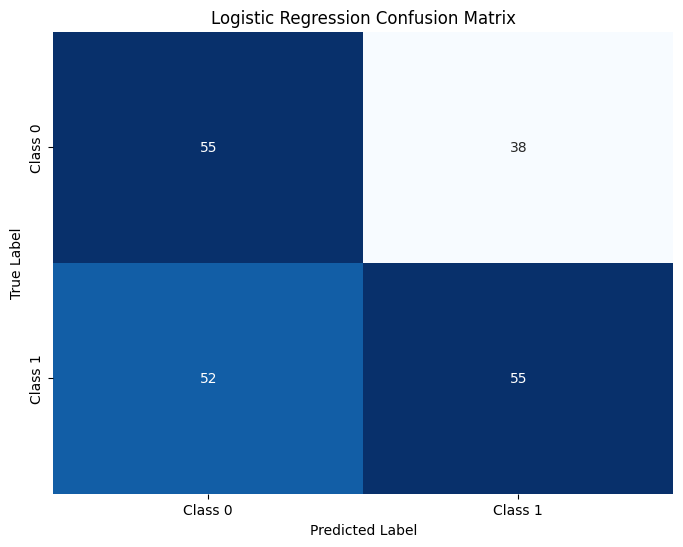


Decision Tree Evaluation: 
              precision    recall  f1-score   support

       False       0.47      0.56      0.51        93
        True       0.54      0.45      0.49       107

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.50      0.50       200


Confusion Matrix:
[[52 41]
 [59 48]]


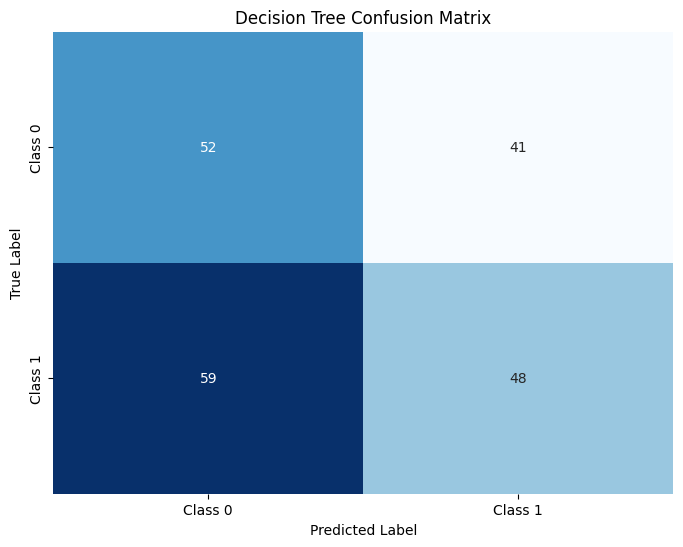


Random Forest Evaluation: 
              precision    recall  f1-score   support

       False       0.51      0.60      0.55        93
        True       0.59      0.50      0.54       107

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200


Confusion Matrix:
[[56 37]
 [54 53]]


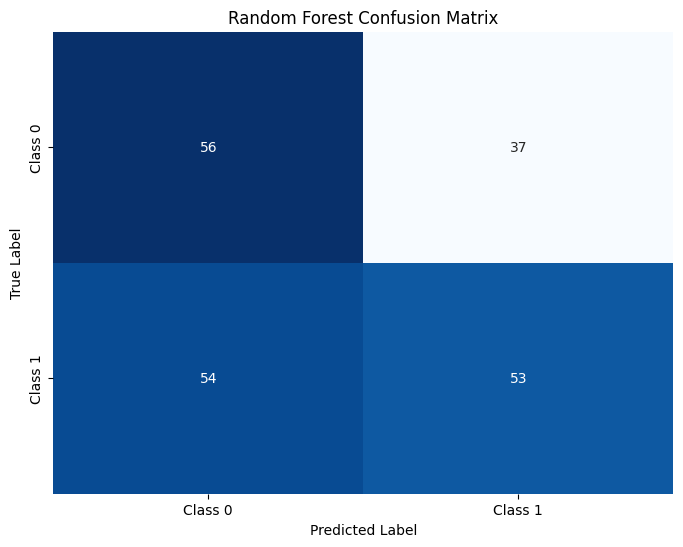

In [12]:
# Evaluate models and print/plot confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation: ")
    print(classification_report(y_test, y_pred))

    # Print and plot confusion matrix
    print_and_plot_confusion_matrix(y_test, y_pred, f"{name} Confusion Matrix")

## Model Refinement

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# define the parameter grid for random forest
params_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

In [15]:
# Innitiliaze the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_grid, cv = 5, n_jobs = -1, scoring="accuracy")

In [16]:
# fit the grid search cv
grid_search.fit(X_train, y_train)
GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [17]:
# best parameters
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}


In [18]:
# Save the best model
with open("../models/best_random_forest_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model refinement completed and best model saved")

Model refinement completed and best model saved
